<a href="https://colab.research.google.com/github/segravjf/python_practice/blob/main/births_by_state.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Births by state

Given the following [dataset](https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/06_Stats/US_Baby_Names/US_Baby_Names_right.csv), can you find the top state for baby births? One way to show this visually to a stakeholder would be to plot the births by state (using something like matplotlib).

In [1]:
## Import some modules
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
## Import dataset
df_raw = pd.read_csv('https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/06_Stats/US_Baby_Names/US_Baby_Names_right.csv')

In [3]:
df_raw.head()

,Unnamed: 0,Id,Name,Year,Gender,State,Count
0,11349,11350,Emma,2004,F,AK,62
1,11350,11351,Madison,2004,F,AK,48
2,11351,11352,Hannah,2004,F,AK,46
3,11352,11353,Grace,2004,F,AK,44
4,11353,11354,Emily,2004,F,AK,41


In [4]:
## Double check that the ID is unique across the dataset
gb_id = df_raw.groupby(['Id'])['Count'].count().reset_index()
gb_id.sort_values(by='Count',ascending=False)

,Id,Count
0,11350,1
677601,3849769,1
677588,3849756,1
677589,3849757,1
677590,3849758,1
...,...,...
338803,1803129,1
338804,1803130,1
338805,1803131,1
338806,1803132,1


Nice, looks like we are in the clear on the ID being distinct.

In [7]:
## Get the sum of births by state
df = df_raw.groupby(['State'])['Count'].sum().reset_index()

gb_state = df.sort_values(by='Count', ascending = False)

gb_state

,State,Count
4,CA,5084647
43,TX,3791675
34,NY,2208154
9,FL,1976379
14,IL,1486991
35,OH,1286370
38,PA,1276091
10,GA,1185168
27,NC,1078680
22,MI,1038080


In [9]:
## Double check the matplotlib params
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']

[6.4, 4.8]

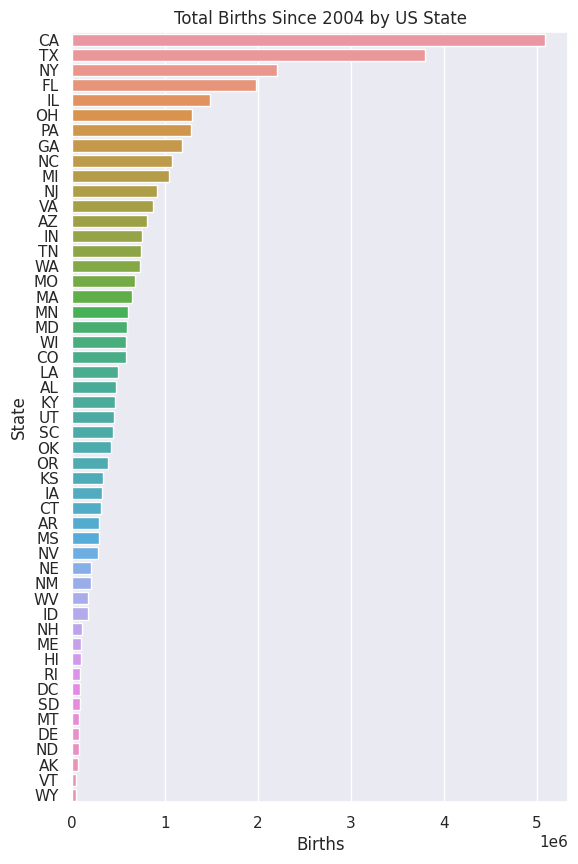

In [11]:
## Do a quick bar plot
sns.set(rc={'figure.figsize':(6.4,10)})
ax = sns.barplot(data=gb_state, x="Count", y="State")

ax.set(xlabel='Births',
       ylabel='State',
       title='Total Births Since 2004 by US State')

plt.show()

In [15]:
## Do a US map as well using plotly
import plotly.express as px

fig = px.choropleth(locations=df['State'],
                    locationmode='USA-states',
                    color=df['Count'],
                    scope='usa',)
fig.show()

In [19]:
## Finally, how about a line chart for, say, the top 10 states?
top10 = list(gb_state.iloc[:10,0])

top10

['CA', 'TX', 'NY', 'FL', 'IL', 'OH', 'PA', 'GA', 'NC', 'MI']

In [22]:
## Create a df grouped by state and year, then subset to the top 10 states
gb_year_state = df_raw.groupby(['State','Year'])['Count'].sum().reset_index()
gb_year_top10 = gb_year_state[gb_year_state['State'].isin(top10)]

gb_year_top10

,State,Year,Count
44,CA,2004,480593
45,CA,2005,484148
46,CA,2006,494605
47,CA,2007,497195
48,CA,2008,482863
...,...,...,...
479,TX,2010,337544
480,TX,2011,329998
481,TX,2012,334705
482,TX,2013,339517


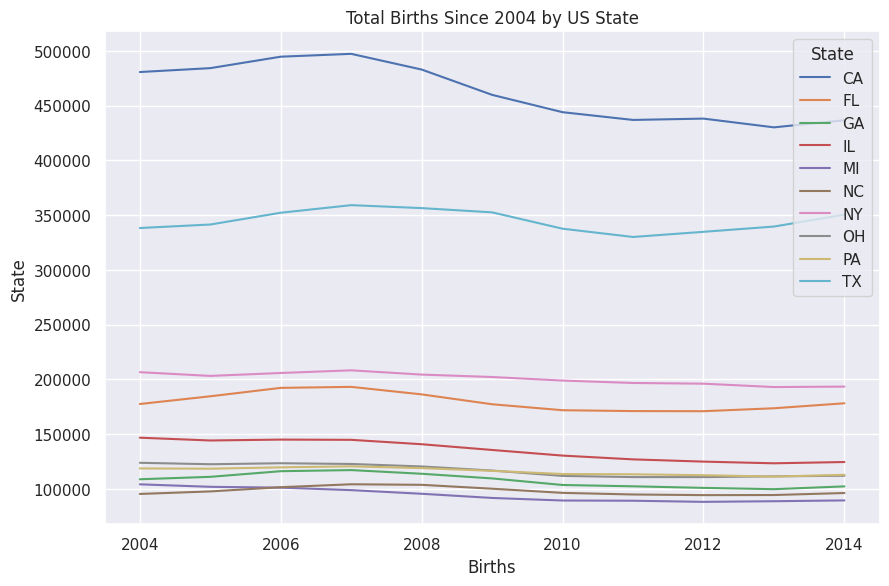

In [23]:
## Build a line chart
## Do a quick bar plot
sns.set(rc={'figure.figsize':(10, 6.4)})
ax = sns.lineplot(data=gb_year_top10, x="Year", y="Count", hue='State')

ax.set(xlabel='Births',
       ylabel='State',
       title='Total Births Since 2004 by US State')

plt.show()